In [2]:
from sys import path
from pathlib import Path

ROOT = Path().resolve().parent
if str(ROOT) not in path:
    path.insert(0, str(ROOT))
    print(f"Added {ROOT} to sys.path")


from utils.dataset_loader import get_dataset_path, load_dataset, get_data_split
from utils.dataset_preprocessor import make_train_valid_split, to_spark_dfs, stop_spark_session
import pprint
from batchtrainingbooster.trainers.catboost_trainer import CatBoostTrainer
from batchtrainingbooster.trainers.xgboost_trainer import XGBoostTrainer



print('Load Multiclass Dataset')
dataset_path = get_dataset_path("data/multiclass_dataset")
df = load_dataset(dataset_path)

print(f"Loaded dataset: {dataset_path.name}, shape = {df.shape}")
display(df.head())

print('*'*50)
print('*'*50)

print('Load Binary Dataset')

train_df = get_data_split("train")
print(f"Loaded training dataset: shape = {train_df.shape}")
display(train_df.head())


test_df = get_data_split("test")
print(f"Loaded test dataset: shape = {test_df.shape}")
display(test_df.head())


columns_todrop = ["Name", "PassengerId"]
train_df = train_df.drop(columns=columns_todrop)
test_df = test_df.drop(columns=columns_todrop)

print(f"Training dataset shape after dropping columns {columns_todrop}: {train_df.shape}")
print(f"Test dataset shape after dropping columns {columns_todrop}: {test_df.shape}")

print('Split - Binary Dataset In Train/Valid and Transform in spark dataframe')
print("Splitting training data into train and validation sets...")
train_df, valid_df = make_train_valid_split(train_df,target='Survived', train_size = 0.8,val_size = 0.2,random_state=42)
print(f"Train set shape: {train_df.shape}, Validation set shape: {valid_df.shape}")

print("Converting pandas DataFrames to Spark DataFrames...")
spark_train_df, spark_valid_df = to_spark_dfs(train_df, valid_df)



Added /Users/surelmanda/Data-Science-Projects/batchtrainingbooster to sys.path
Load Multiclass Dataset
Loaded dataset: ObesityDataset.csv, shape = (2111, 17)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**************************************************
**************************************************
Load Binary Dataset
Loaded training dataset: shape = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Loaded test dataset: shape = (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Training dataset shape after dropping columns ['Name', 'PassengerId']: (891, 10)
Test dataset shape after dropping columns ['Name', 'PassengerId']: (418, 9)
Split - Binary Dataset In Train/Valid and Transform in spark dataframe
Splitting training data into train and validation sets...
[SPLIT] Train shape: (712, 10) | Validation shape: (179, 10)
Train set shape: (712, 10), Validation set shape: (179, 10)
Converting pandas DataFrames to Spark DataFrames...


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/09/08 17:38:15 WARN Utils: Your hostname, MacBook-Air-di-Surel.local, resolves to a loopback address: 127.0.0.1; using 100.68.3.231 instead (on interface en0)
25/09/08 17:38:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/08 17:38:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


[SPARK] Conversion successful → Spark DataFrames created.


[SPARK] Train rows: 712 | Validation rows: 179


2025-09-08 17:33:46,867 - batchtrainingbooster.core.base_trainer - INFO - Validating input parameters
2025-09-08 17:33:46,932 - batchtrainingbooster.core.base_trainer - INFO - Preparing training data
2025-09-08 17:33:46,932 - batchtrainingbooster.core.base_trainer - INFO - Preparing validation data
2025-09-08 17:33:46,933 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for validation.


Importing CatBoostTrainer
===== Configuration CatBoost =====
{'loss_function': 'Logloss',
 'eval_metric': 'Logloss',
 'iterations': 100,
 'learning_rate': 0.01,
 'depth': 6,
 'l2_leaf_reg': 3.0,
 'auto_class_weights': 'Balanced',
 'bootstrap_type': 'Bernoulli',
 'subsample': 0.8,
 'random_seed': 42,
 'verbose': True,
 'early_stopping_rounds': 10}
Applying fit method


2025-09-08 17:33:48,305 - batchtrainingbooster.core.base_trainer - INFO - Categorical features detected in validation set
2025-09-08 17:33:48,306 - batchtrainingbooster.core.base_trainer - INFO - Number of categorical features identified: 4
2025-09-08 17:33:48,307 - batchtrainingbooster.core.base_trainer - INFO - Initializing training state for CatBoost
2025-09-08 17:33:48,307 - batchtrainingbooster.core.base_trainer - INFO - 🚀 Starting CatBoost training with 2 batches
2025-09-08 17:33:48,308 - batchtrainingbooster.core.base_trainer - INFO - Starting to process DataFrame in batches...
2025-09-08 17:33:48,308 - batchtrainingbooster.core.base_trainer - INFO - Creating batches...
2025-09-08 17:33:48,437 - batchtrainingbooster.core.base_trainer - INFO - Created 2 batches stratified by Survived
2025-09-08 17:33:48,438 - batchtrainingbooster.core.base_trainer - INFO - Batches created successfully.
2025-09-08 17:33:48,438 - batchtrainingbooster.core.base_trainer - INFO - Batches created and a

0:	learn: 0.6903832	test: 0.6905148	test1: 0.6909352	best: 0.6909352 (0)	total: 2.04ms	remaining: 202ms
1:	learn: 0.6872507	test: 0.6873820	test1: 0.6882021	best: 0.6882021 (1)	total: 2.66ms	remaining: 130ms
2:	learn: 0.6841130	test: 0.6842440	test1: 0.6854275	best: 0.6854275 (2)	total: 4.67ms	remaining: 151ms
3:	learn: 0.6810632	test: 0.6811937	test1: 0.6827697	best: 0.6827697 (3)	total: 5.69ms	remaining: 136ms
4:	learn: 0.6780508	test: 0.6781925	test1: 0.6800808	best: 0.6800808 (4)	total: 6.69ms	remaining: 127ms
5:	learn: 0.6751175	test: 0.6752975	test1: 0.6776233	best: 0.6776233 (5)	total: 7.52ms	remaining: 118ms
6:	learn: 0.6726204	test: 0.6727710	test1: 0.6755443	best: 0.6755443 (6)	total: 8.26ms	remaining: 110ms
7:	learn: 0.6697899	test: 0.6699405	test1: 0.6730768	best: 0.6730768 (7)	total: 8.7ms	remaining: 100ms
8:	learn: 0.6670604	test: 0.6671735	test1: 0.6708985	best: 0.6708985 (8)	total: 9.33ms	remaining: 94.4ms
9:	learn: 0.6645903	test: 0.6646150	test1: 0.6686601	best: 0.668

2025-09-08 17:33:50,626 - batchtrainingbooster.core.base_trainer - INFO - 📦 Processing batch 2/2
2025-09-08 17:33:50,627 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training CatBoost model on batch 2/2
2025-09-08 17:33:50,698 - batchtrainingbooster.core.base_trainer - INFO - ✅ Model trained on batch 2/2
2025-09-08 17:33:50,699 - batchtrainingbooster.core.base_trainer - INFO - Batch 2 - Train: 0.46579 | Valid: 0.53052
2025-09-08 17:33:50,700 - batchtrainingbooster.core.base_trainer - INFO - 🎉 New best model found with Valid Loss: 0.53052 (improvement: 0.02381)
2025-09-08 17:33:50,701 - batchtrainingbooster.core.base_trainer - INFO - Plotting learning curve of CatBoost model...


0:	learn: 0.5426633	test: 0.5426202	test1: 0.5543634	best: 0.5543634 (0)	total: 922us	remaining: 91.3ms
1:	learn: 0.5416353	test: 0.5419264	test1: 0.5537480	best: 0.5537480 (1)	total: 1.73ms	remaining: 85ms
2:	learn: 0.5405182	test: 0.5408084	test1: 0.5529273	best: 0.5529273 (2)	total: 2.23ms	remaining: 72.3ms
3:	learn: 0.5395048	test: 0.5397558	test1: 0.5526232	best: 0.5526232 (3)	total: 2.72ms	remaining: 65.3ms
4:	learn: 0.5387460	test: 0.5392931	test1: 0.5521705	best: 0.5521705 (4)	total: 3.22ms	remaining: 61.2ms
5:	learn: 0.5378096	test: 0.5388057	test1: 0.5521195	best: 0.5521195 (5)	total: 3.5ms	remaining: 54.9ms
6:	learn: 0.5370104	test: 0.5383980	test1: 0.5520310	best: 0.5520310 (6)	total: 4.14ms	remaining: 55ms
7:	learn: 0.5365018	test: 0.5378089	test1: 0.5518345	best: 0.5518345 (7)	total: 4.32ms	remaining: 49.7ms
8:	learn: 0.5357556	test: 0.5370502	test1: 0.5514178	best: 0.5514178 (8)	total: 4.84ms	remaining: 49ms
9:	learn: 0.5349026	test: 0.5361140	test1: 0.5509812	best: 0.55

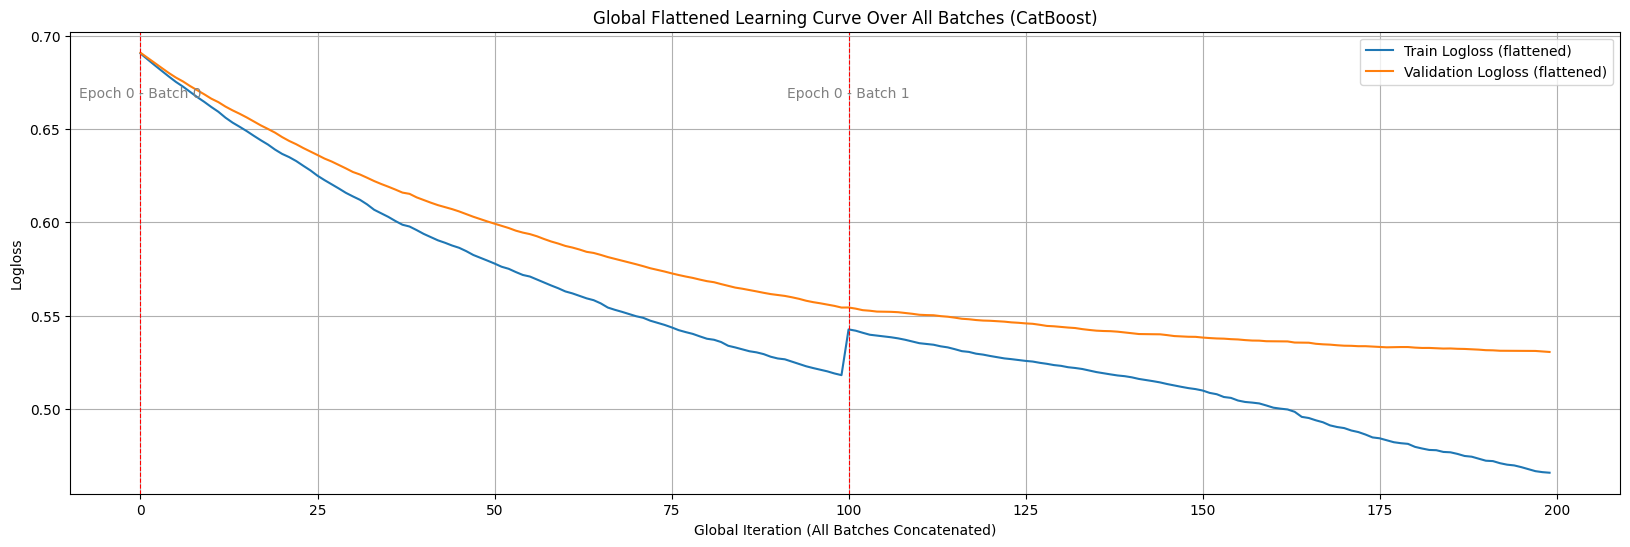

2025-09-08 17:33:50,928 - batchtrainingbooster.core.base_trainer - INFO - Learning curve plotted successfully.
2025-09-08 17:33:50,929 - batchtrainingbooster.core.base_trainer - INFO - CatBoost training completed successfully!
2025-09-08 17:33:50,929 - batchtrainingbooster.core.base_trainer - INFO - Total batches processed: 2
2025-09-08 17:33:50,930 - batchtrainingbooster.core.base_trainer - INFO - Best validation loss: 0.53052
2025-09-08 17:33:50,930 - batchtrainingbooster.core.base_trainer - INFO - Using best model
2025-09-08 17:33:50,931 - batchtrainingbooster.core.base_trainer - INFO - Categorical features used: 4


In [7]:
# Définition de la colonne cible
target_column = "Survived"

# Instanciation du trainer
print("Importing CatBoostTrainer")
trainer = CatBoostTrainer()
# print("CatBoostTrainer imported and instantiated successfully:", trainer)


# Binary class
config_model = {
    "loss_function": "Logloss",      # fonction de perte binaire
    "eval_metric": "Logloss",        # métrique d’évaluation choisie
    "iterations": 100,
    "learning_rate": 0.01,
    "depth": 6,
    "l2_leaf_reg": 3.0,
    "auto_class_weights": "Balanced",  # utile si classes déséquilibrées
    "bootstrap_type": "Bernoulli",
    "subsample": 0.8,
    "random_seed": 42,
    "verbose": True,
    "early_stopping_rounds": 10,
    #"use_best_model": True,
}

config_training = {
    "num_batches": 2,  # nombre de lots pour l'entraînement
    "max_patience": 5,  # patience pour early stopping global
    "show_learning_curve": True,  # afficher la courbe d'apprentissage
}

print("===== Configuration CatBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    config_training=config_training,
    config_model=config_model,
)

2025-09-08 17:33:53,719 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for validation.


Importing XGBoostTrainer
XGBoostTrainer imported and instantiated successfully: <batchtrainingbooster.trainers.xgboost_trainer.XGBoostTrainer object at 0x120ff0510>
===== Configuration XGBoost =====
{'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'n_estimators': 300,
 'learning_rate': 0.05,
 'max_depth': 6,
 'reg_lambda': 3.0,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'random_state': 42,
 'early_stopping_rounds': 10}
Applying fit method


2025-09-08 17:33:54,339 - batchtrainingbooster.core.base_trainer - INFO - Categorical features detected - Enabling categorical support
2025-09-08 17:33:54,340 - batchtrainingbooster.core.base_trainer - INFO - 🚀 Starting XGBoost training with 3 batches
2025-09-08 17:33:54,341 - batchtrainingbooster.core.base_trainer - INFO - Starting to process DataFrame in batches...
2025-09-08 17:33:54,341 - batchtrainingbooster.core.base_trainer - INFO - Creating batches...
2025-09-08 17:33:54,620 - batchtrainingbooster.core.base_trainer - INFO - Created 3 batches stratified by Survived
2025-09-08 17:33:54,621 - batchtrainingbooster.core.base_trainer - INFO - Batches created successfully.
2025-09-08 17:33:54,622 - batchtrainingbooster.core.base_trainer - INFO - Batches created and applied to DataFrame.
2025-09-08 17:33:54,623 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 0
2025-09-08 17:33:54,662 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark Dat

[0]	validation_0-logloss:0.65058	validation_1-logloss:0.67692
[1]	validation_0-logloss:0.61716	validation_1-logloss:0.66398
[2]	validation_0-logloss:0.58715	validation_1-logloss:0.65532
[3]	validation_0-logloss:0.56606	validation_1-logloss:0.64561
[4]	validation_0-logloss:0.54080	validation_1-logloss:0.63395
[5]	validation_0-logloss:0.52021	validation_1-logloss:0.62463
[6]	validation_0-logloss:0.49922	validation_1-logloss:0.61585
[7]	validation_0-logloss:0.48222	validation_1-logloss:0.60188
[8]	validation_0-logloss:0.46661	validation_1-logloss:0.59952
[9]	validation_0-logloss:0.45164	validation_1-logloss:0.59392
[10]	validation_0-logloss:0.44330	validation_1-logloss:0.58959
[11]	validation_0-logloss:0.43253	validation_1-logloss:0.58601
[12]	validation_0-logloss:0.41929	validation_1-logloss:0.57655
[13]	validation_0-logloss:0.40921	validation_1-logloss:0.57233
[14]	validation_0-logloss:0.40082	validation_1-logloss:0.56443
[15]	validation_0-logloss:0.39169	validation_1-logloss:0.55855
[1

2025-09-08 17:33:56,012 - batchtrainingbooster.core.base_trainer - INFO - Batch 1 - Train: 0.20897 | Valid: 0.51020
2025-09-08 17:33:56,015 - batchtrainingbooster.core.base_trainer - INFO - New best validation loss: 0.51020 (improvement: inf)
2025-09-08 17:33:56,019 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 1
2025-09-08 17:33:56,057 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 1
2025-09-08 17:33:56,954 - batchtrainingbooster.core.base_trainer - INFO - Processing batch 2/3
2025-09-08 17:33:56,955 - batchtrainingbooster.core.base_trainer - INFO - Calculating sample weights for batch 2
2025-09-08 17:33:56,962 - batchtrainingbooster.core.base_trainer - INFO - Learning rate for batch 2: 0.020000
2025-09-08 17:33:56,964 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training XGBoost on batch 2


[0]	validation_0-logloss:0.50632	validation_1-logloss:0.50777
[1]	validation_0-logloss:0.50412	validation_1-logloss:0.50765
[2]	validation_0-logloss:0.50145	validation_1-logloss:0.50766
[3]	validation_0-logloss:0.49877	validation_1-logloss:0.50741
[4]	validation_0-logloss:0.49625	validation_1-logloss:0.50703
[5]	validation_0-logloss:0.49457	validation_1-logloss:0.50667
[6]	validation_0-logloss:0.49213	validation_1-logloss:0.50672
[7]	validation_0-logloss:0.49056	validation_1-logloss:0.50647
[8]	validation_0-logloss:0.48817	validation_1-logloss:0.50655
[9]	validation_0-logloss:0.48585	validation_1-logloss:0.50712
[10]	validation_0-logloss:0.48331	validation_1-logloss:0.50591
[11]	validation_0-logloss:0.48104	validation_1-logloss:0.50508
[12]	validation_0-logloss:0.47826	validation_1-logloss:0.50458
[13]	validation_0-logloss:0.47659	validation_1-logloss:0.50426
[14]	validation_0-logloss:0.47481	validation_1-logloss:0.50406
[15]	validation_0-logloss:0.47269	validation_1-logloss:0.50375
[1

2025-09-08 17:33:57,156 - batchtrainingbooster.core.base_trainer - INFO - Batch 2 - Train: 0.43466 | Valid: 0.50125
2025-09-08 17:33:57,163 - batchtrainingbooster.core.base_trainer - INFO - New best validation loss: 0.50125 (improvement: 0.00896)
2025-09-08 17:33:57,170 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 2
2025-09-08 17:33:57,209 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 2
2025-09-08 17:33:58,111 - batchtrainingbooster.core.base_trainer - INFO - Processing batch 3/3
2025-09-08 17:33:58,112 - batchtrainingbooster.core.base_trainer - INFO - Calculating sample weights for batch 3
2025-09-08 17:33:58,118 - batchtrainingbooster.core.base_trainer - INFO - Learning rate for batch 3: 0.004000
2025-09-08 17:33:58,119 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training XGBoost on batch 3


[0]	validation_0-logloss:0.46312	validation_1-logloss:0.50299
[1]	validation_0-logloss:0.46261	validation_1-logloss:0.50336
[2]	validation_0-logloss:0.46204	validation_1-logloss:0.50378
[3]	validation_0-logloss:0.46146	validation_1-logloss:0.50414
[4]	validation_0-logloss:0.46097	validation_1-logloss:0.50453
[5]	validation_0-logloss:0.46041	validation_1-logloss:0.50494
[6]	validation_0-logloss:0.46000	validation_1-logloss:0.50496
[7]	validation_0-logloss:0.45949	validation_1-logloss:0.50533
[8]	validation_0-logloss:0.45897	validation_1-logloss:0.50573
[9]	validation_0-logloss:0.45843	validation_1-logloss:0.50615
[10]	validation_0-logloss:0.45787	validation_1-logloss:0.50666


2025-09-08 17:33:58,170 - batchtrainingbooster.core.base_trainer - INFO - Batch 3 - Train: 0.45787 | Valid: 0.50666
2025-09-08 17:33:58,174 - batchtrainingbooster.core.base_trainer - INFO - ⏳ No improvement - Patience: 1/5


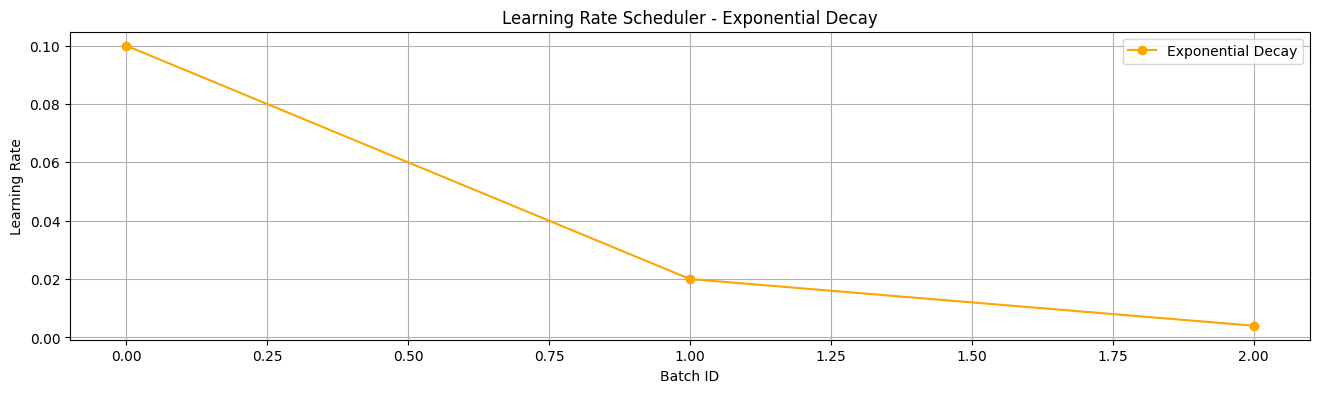

2025-09-08 17:33:58,280 - batchtrainingbooster.core.base_trainer - INFO - Plotting learning curve of XGBoost model...


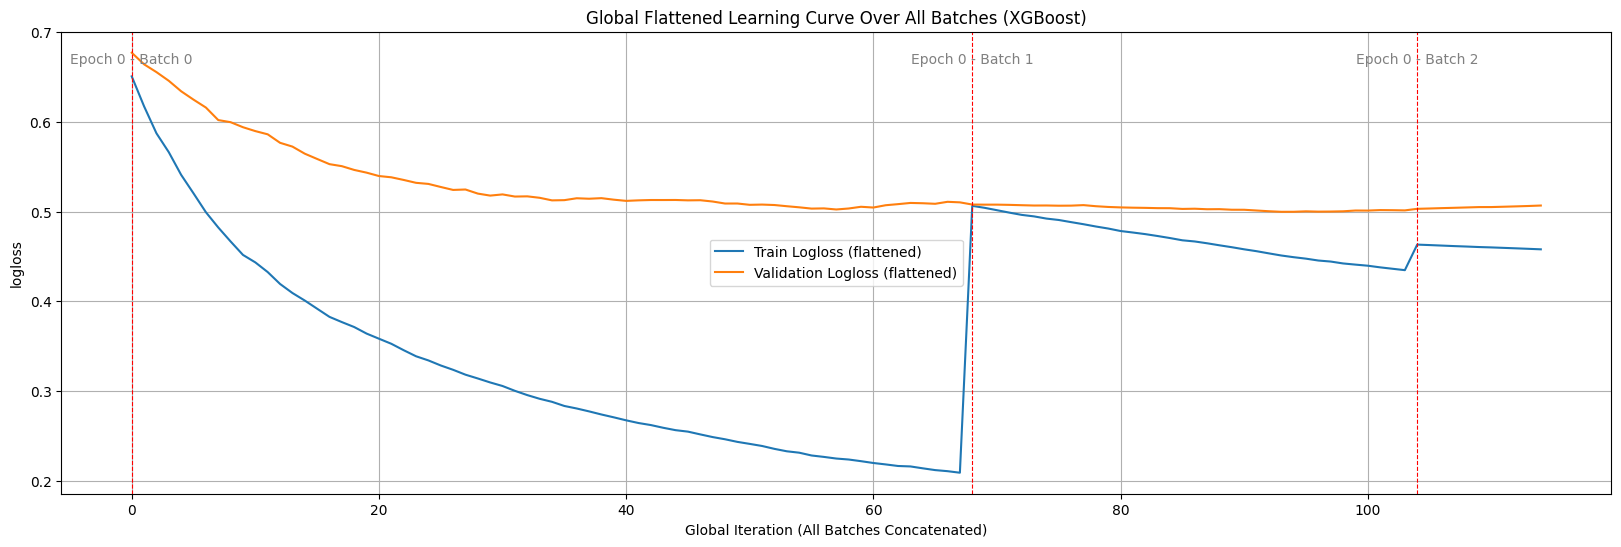

2025-09-08 17:33:58,397 - batchtrainingbooster.core.base_trainer - INFO - Learning curve plotted successfully.
2025-09-08 17:33:58,398 - batchtrainingbooster.core.base_trainer - INFO - Training completed successfully!
2025-09-08 17:33:58,398 - batchtrainingbooster.core.base_trainer - INFO - Total batches processed: 3
2025-09-08 17:33:58,399 - batchtrainingbooster.core.base_trainer - INFO - Best validation loss: 0.50125
2025-09-08 17:33:58,399 - batchtrainingbooster.core.base_trainer - INFO - Using best model


In [8]:
print("Importing XGBoostTrainer")
trainer = XGBoostTrainer()
print("XGBoostTrainer imported and instantiated successfully:", trainer)

target_column = "Survived"

# Binaire
config_model = {
    "objective": "binary:logistic",   # classification binaire #binary:logitraw #binary:logistic 
    "eval_metric": "logloss", #["auc", "logloss"],  # suivre AUC et logloss
    "n_estimators": 300,              # équivalent à iterations
    "learning_rate": 0.05,
    "max_depth": 6,
    "reg_lambda": 3.0,                # l2_leaf_reg -> reg_lambda
    "subsample": 0.8,
    "colsample_bytree": 0.8,          # sous-échantillonnage des features
    "random_state": 42,
    #"verbosity": 1,                   # 0 = silent, 1 = warnings
    #"verbose": 10,                   # 0 = silent, 1 = warnings
    "early_stopping_rounds": 10,      # géré via fit()
}

config_lr_scheduler = {
    "initial_lr": 0.1,
    "decay_rate": 0.20,
}

config_training = {
    "num_batches": 3,  # nombre de lots pour l'entraînement
    "max_patience": 5,  # patience pour early stopping global
    "show_learning_curve": True,  # afficher la courbe d'apprentissage
}

print("===== Configuration XGBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    config_training = config_training,
    config_model=config_model,
    config_lr_scheduler=config_lr_scheduler,
)


In [9]:
# Récupérer la session Spark active
spark = spark_train_df.sparkSession

# Stopper Spark
stop_spark_session(spark)

[SPARK] Stopping Spark session...
[SPARK] Session stopped successfully.


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    roc_auc_score, accuracy_score, f1_score, log_loss
)
import warnings
warnings.filterwarnings('ignore')


# ---------- Utils génériques ----------
def _detect_task_type(y: pd.Series, multiclass_max_classes: int = 100):
    """Retourne 'regression' | 'binary' | 'multiclass'."""
    # Si dtype numérique flottant avec bcp de valeurs uniques -> régression
    nunique = y.nunique(dropna=False)
    if nunique == 2:
        return "binary"
    # multiclass si nombre de classes raisonnable
    if (np.issubdtype(y.dtype, np.integer) or y.dtype == "object") and 3 <= nunique <= multiclass_max_classes:
        return "multiclass"
    # sinon, régression par défaut
    return "regression"


def _prepare_labels(y_train: pd.Series, y_valid: pd.Series, task_type: str):
    """Encode labels si nécessaire et retourne (y_train_enc, y_valid_enc, label_decoder or None)."""
    if task_type == "regression":
        return y_train.astype(float), y_valid.astype(float), None

    # classification -> encoder si besoin (LightGBM demande int [0..K-1] pour multiclass)
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_valid_enc = le.transform(y_valid)
    return pd.Series(y_train_enc), pd.Series(y_valid_enc), le


def _auto_lgb_params(task_type: str):
    if task_type == "regression":
        return {"objective": "regression", "metric": "rmse"}
    if task_type == "binary":
        return {"objective": "binary", "metric": ["binary_logloss", "auc"]}
    # multiclass
    return {"objective": "multiclass", "metric": ["multi_logloss", "auc_mu"]}


def _merge_params(base: dict, override: dict | None):
    out = base.copy()
    if override:
        out.update(override)
    return out


# ---------- API principale ----------
def batch_training_lightgbm_generic(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_column: str,
    n_batches: int = 5,
    lgb_params: dict | None = None,
    num_boost_round: int = 200,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
):
    """
    Entraîne un LightGBM en batch cumulatif (régression, binaire ou multiclasse).
    S'adapte automatiquement au type de tâche et calcule les métriques correspondantes.

    Returns
    -------
    dict : {
        'task_type': str,
        'batch_reports': [ { 'batch': int, 'cumulative_samples': int, 'metrics': {..}, 'best_iteration': int } ],
        'models': [lgb.Booster, ...],
        'histories': [evals_result, ...]
    }
    """

    # Split X/y
    X_train = train_df.drop(columns=[label_column])
    y_train = train_df[label_column]
    X_valid = valid_df.drop(columns=[label_column])
    y_valid = valid_df[label_column]

    # Détection du type de tâche
    task_type = _detect_task_type(y_train)

    # Encodage labels si nécessaire
    y_train_enc, y_valid_enc, label_decoder = _prepare_labels(y_train, y_valid, task_type)

    # Paramètres LightGBM
    base_params = {
        "boosting_type": "gbdt",
        "num_leaves": 31,
        "learning_rate": 0.05,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    base_params.update(_auto_lgb_params(task_type))
    params = _merge_params(base_params, lgb_params)

    # Pour multiclass, préciser num_class
    if task_type == "multiclass":
        params["num_class"] = int(np.unique(y_train_enc).shape[0])

    # Découpage en batches
    n = len(train_df)
    batch_size = max(1, n // n_batches)
    batches = []
    for i in range(n_batches):
        start = i * batch_size
        end = n if i == n_batches - 1 else (i + 1) * batch_size
        batches.append((
            X_train.iloc[start:end],
            y_train_enc.iloc[start:end]
        ))

    results = {
        "task_type": task_type,
        "batch_reports": [],
        "models": [],
        "histories": [],
        "label_decoder": label_decoder,  # utile si tu veux retransformer des classes plus tard
    }

    cumulative_X = pd.DataFrame()
    cumulative_y = pd.Series(dtype=y_train_enc.dtype)

    print("=== DÉBUT DU BATCH TRAINING (générique) ===\nType de tâche détecté :", task_type.upper(), "\n")
    for b_idx, (bX, bY) in enumerate(batches, 1):
        cumulative_X = pd.concat([cumulative_X, bX], ignore_index=True)
        cumulative_y = pd.concat([cumulative_y, bY], ignore_index=True)

        train_data = lgb.Dataset(cumulative_X, label=cumulative_y)
        valid_data = lgb.Dataset(X_valid, label=y_valid_enc, reference=train_data)

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            #valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.log_evaluation(period=0),
                lgb.record_evaluation(evals_result),
            ],
        )

        # Prédictions & métriques génériques
        if task_type == "regression":
            pred_train = model.predict(cumulative_X)
            pred_valid = model.predict(X_valid)

            metrics = {
                "rmse_train": float(np.sqrt(mean_squared_error(cumulative_y, pred_train))),
                "rmse_valid": float(np.sqrt(mean_squared_error(y_valid_enc, pred_valid))),
                "mae_train": float(mean_absolute_error(cumulative_y, pred_train)),
                "mae_valid": float(mean_absolute_error(y_valid_enc, pred_valid)),
                "r2_train": float(r2_score(cumulative_y, pred_train)),
                "r2_valid": float(r2_score(y_valid_enc, pred_valid)),
            }

        elif task_type == "binary":
            proba_train = model.predict(cumulative_X)  # proba classe 1
            proba_valid = model.predict(X_valid)
            pred_train = (proba_train >= 0.5).astype(int)
            pred_valid = (proba_valid >= 0.5).astype(int)

            # certaines métriques peuvent échouer si y est constant, gérer doucement
            metrics = {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0,1])),
                "auc_valid": float(roc_auc_score(y_valid_enc, proba_valid)) if len(np.unique(y_valid_enc)) == 2 else np.nan,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
                "accuracy_train": float(accuracy_score(cumulative_y, pred_train)),
                "f1_train": float(f1_score(cumulative_y, pred_train, average="binary")),
            }

        else:  # multiclass
            proba_train = model.predict(cumulative_X)  # shape (n, K)
            proba_valid = model.predict(X_valid)
            pred_train = np.argmax(proba_train, axis=1)
            pred_valid = np.argmax(proba_valid, axis=1)

            metrics = {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid)),
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_macro_valid": float(f1_score(y_valid_enc, pred_valid, average="macro")),
                "accuracy_train": float(accuracy_score(cumulative_y, pred_train)),
                "f1_macro_train": float(f1_score(cumulative_y, pred_train, average="macro")),
            }

        report = {
            "batch": b_idx,
            "cumulative_samples": int(len(cumulative_X)),
            "metrics": metrics,
            "best_iteration": int(model.best_iteration),
        }
        results["batch_reports"].append(report)
        results["models"].append(model)
        results["histories"].append(evals_result)

        print(f"--- BATCH {b_idx}/{n_batches} ---")
        print(f"Échantillons cumulatifs: {len(cumulative_X)}")
        for k, v in metrics.items():
            print(f"{k}: {v:.4f}")
        print(f"Best iteration: {model.best_iteration}\n")

    return results


def plot_batch_results_generic(results, figsize=(14, 9)):
    """Trace l’évolution des métriques pertinentes selon le task_type."""
    task = results["task_type"]
    reports = results["batch_reports"]
    batches = [r["batch"] for r in reports]

    plt.figure(figsize=figsize)

    if task == "regression":
        rmse_valid = [r["metrics"]["rmse_valid"] for r in reports]
        rmse_train = [r["metrics"]["rmse_train"] for r in reports]
        r2_valid = [r["metrics"]["r2_valid"] for r in reports]

        plt.subplot(2,1,1)
        plt.plot(batches, rmse_train, marker="o", label="RMSE Train")
        plt.plot(batches, rmse_valid, marker="o", label="RMSE Valid")
        plt.xlabel("Batch"); plt.ylabel("RMSE"); plt.title("Évolution RMSE"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(2,1,2)
        plt.plot(batches, r2_valid, marker="o", label="R² Valid")
        plt.xlabel("Batch"); plt.ylabel("R²"); plt.title("Évolution R² (validation)"); plt.grid(True, alpha=0.3); plt.legend()

    elif task == "binary":
        acc_valid = [r["metrics"]["accuracy_valid"] for r in reports]
        f1_valid = [r["metrics"]["f1_valid"] for r in reports]
        auc_valid = [r["metrics"].get("auc_valid", np.nan) for r in reports]

        plt.subplot(3,1,1)
        plt.plot(batches, acc_valid, marker="o", label="Accuracy Valid")
        plt.xlabel("Batch"); plt.ylabel("Accuracy"); plt.title("Accuracy (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,2)
        plt.plot(batches, f1_valid, marker="o", label="F1 Valid")
        plt.xlabel("Batch"); plt.ylabel("F1"); plt.title("F1 (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,3)
        plt.plot(batches, auc_valid, marker="o", label="AUC Valid")
        plt.xlabel("Batch"); plt.ylabel("AUC"); plt.title("AUC (validation)"); plt.grid(True, alpha=0.3); plt.legend()

    else:  # multiclass
        acc_valid = [r["metrics"]["accuracy_valid"] for r in reports]
        f1_macro_valid = [r["metrics"]["f1_macro_valid"] for r in reports]
        logloss_valid = [r["metrics"]["logloss_valid"] for r in reports]

        plt.subplot(3,1,1)
        plt.plot(batches, acc_valid, marker="o", label="Accuracy Valid")
        plt.xlabel("Batch"); plt.ylabel("Accuracy"); plt.title("Accuracy (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,2)
        plt.plot(batches, f1_macro_valid, marker="o", label="F1 Macro Valid")
        plt.xlabel("Batch"); plt.ylabel("F1 Macro"); plt.title("F1 Macro (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,3)
        plt.plot(batches, logloss_valid, marker="o", label="LogLoss Valid")
        plt.xlabel("Batch"); plt.ylabel("LogLoss"); plt.title("LogLoss (validation)"); plt.grid(True, alpha=0.3); plt.legend()

    plt.tight_layout()
    plt.show()


def print_batch_summary_generic(results):
    task = results["task_type"]
    print("\n=== RÉSUMÉ GÉNÉRIQUE PAR BATCH ===")
    header = f"{'Batch':<6} {'Cum.Samples':<12} {'BestIter':<9}  Metrics"
    print(header)
    print("-"*len(header))
    for r in results["batch_reports"]:
        metrics_str = " | ".join([f"{k}={v:.4f}" for k, v in r["metrics"].items()])
        print(f"{r['batch']:<6} {r['cumulative_samples']:<12} {r['best_iteration']:<9}  {metrics_str}")

    # Sélection du "meilleur" batch selon une métrique pivot par task
    if task == "regression":
        key = lambda r: r["metrics"]["rmse_valid"]
        label = "RMSE Valid"
    elif task == "binary":
        # on maximise AUC; s’il n’existe pas, on maximise accuracy
        key = lambda r: (-r["metrics"].get("auc_valid", -np.inf), -r["metrics"]["accuracy_valid"])
        label = "AUC/Accuracy Valid"
    else:
        # on minimise logloss; à défaut on maximise accuracy
        key = lambda r: (r["metrics"]["logloss_valid"], -r["metrics"]["accuracy_valid"])
        label = "LogLoss/Accuracy Valid"

    best = sorted(results["batch_reports"], key=key)[0]
    print("\n🏆 MEILLEUR BATCH ->", best["batch"], f"({label})")




target_column = "Survived"
results = batch_training_lightgbm_generic(
    train_df=train_df,
    valid_df=valid_df,
    label_column=target_column,          # nom générique
    n_batches=5,
    lgb_params=None,                # tu peux surcharger (ex: {'learning_rate': 0.03})
    num_boost_round=300,
    early_stopping_rounds=50,
)

plot_batch_results_generic(results)
print_batch_summary_generic(results)

# Récupérer le meilleur modèle (ex: selon ta logique perso)
best_idx = np.argmin([r["metrics"].get("rmse_valid", np.inf) if results["task_type"]=="regression"
                      else -r["metrics"].get("auc_valid", r["metrics"].get("accuracy_valid", 0.0))
                      for r in results["batch_reports"]])
best_model = results["models"][best_idx]


=== DÉBUT DU BATCH TRAINING (générique) ===
Type de tâche détecté : BINARY 



ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Sex: object, Ticket: object, Cabin: object, Embarked: object